<a href="https://colab.research.google.com/github/deathstar1/deep-hindi-rap/blob/main/deep-hindi-rap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import numpy as np 


In [4]:
tokenizer = Tokenizer()

data = open('/tmp/hindi-rap.txt').read()

corpus = data.lower().split("\n")

tokenizer.fit_on_texts(corpus)
total_word_index = len(tokenizer.word_index) + 1

print(tokenizer.word_index)
print(total_word_index)

print(corpus)
input_sequences = []
for line in corpus:
	token_list = tokenizer.texts_to_sequences([line])[0]
	for i in range(1, len(token_list)):
		n_gram_sequence = token_list[:i+1]
		input_sequences.append(n_gram_sequence)

# pad sequences 
max_len = max([len(x) for x in input_sequences])
input_sequences = np.array(pad_sequences(input_sequences, maxlen=max_len, padding='pre'))

# create predictors and label
x, labels = input_sequences[:,:-1],input_sequences[:,-1]

y = tf.keras.utils.to_categorical(labels, num_classes=total_word_index)

print(x)


{'he': 1, 'me': 2, 'nahi': 3, 'ki': 4, 'se': 5, 'ko': 6, 'ab': 7, 'ke': 8, 'ek': 9, 'apne': 10, 'ka': 11, 'is': 12, 'pyar': 13, 'ho': 14, 'kar': 15, 'na': 16, 'koi': 17, 'per': 18, 'mere': 19, 'duniya': 20, 'to': 21, 'dil': 22, 'jo': 23, 'aye': 24, 'yo': 25, 'or': 26, 'hu': 27, 'tere': 28, 'zindagi': 29, 'apni': 30, 'ye': 31, 'bas': 32, 'bhi': 33, 'gaya': 34, 'khel': 35, 'logo': 36, 'hath': 37, 'samne': 38, 'kuch': 39, 'vo': 40, 'samaj': 41, 'tha': 42, 'meri': 43, 'pe': 44, 'pukar': 45, 'jese': 46, 'tumhare': 47, 'hi': 48, 'mujhe': 49, 'mat': 50, 'ager': 51, 'apna': 52, 'man': 53, 'vahi': 54, 'kaam': 55, 'sach': 56, 'kya': 57, 'sache': 58, 'dar': 59, 'din': 60, 'tu': 61, 'ya': 62, 'tum': 63, 'jahan': 64, 'har': 65, 'ankhon': 66, 'dimag': 67, 'bheed': 68, 'gaye': 69, 'socha': 70, 'jitna': 71, 'sachi': 72, 'jaye': 73, 'be': 74, 'ban': 75, 'tera': 76, 'baat': 77, 'esa': 78, 'rooh': 79, 'ese': 80, 'cha': 81, 'rahi': 82, 'udasi': 83, 'raha': 84, 'sahi': 85, 'ehsaas': 86, 'karna': 87, 'phele

In [5]:
print(tokenizer.word_index['in'])

143


In [6]:
print(x[5])

[  0   0   0   0   0   0  37   2 140 257]


In [7]:
model = Sequential()
model.add(Embedding(total_word_index, 100 , input_length=max_len -1 ))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_word_index,activation ='softmax'))
adam =Adam (lr =0.01)
model.compile(loss = 'categorical_crossentropy' ,  optimizer = adam , metrics =['accuracy'])
history = model.fit(x,y , epochs =200 , verbose =1)
print(model)

Epoch 1/200
51/51 [==============================] - 9s 8ms/step - loss: 6.4152 - accuracy: 0.0332
Epoch 2/200
51/51 [==============================] - 0s 8ms/step - loss: 5.6754 - accuracy: 0.0541
Epoch 3/200
51/51 [==============================] - 0s 8ms/step - loss: 5.0579 - accuracy: 0.0872
Epoch 4/200
51/51 [==============================] - 0s 8ms/step - loss: 3.7843 - accuracy: 0.2268
Epoch 5/200
51/51 [==============================] - 0s 8ms/step - loss: 2.4252 - accuracy: 0.4691
Epoch 6/200
51/51 [==============================] - 0s 8ms/step - loss: 1.2948 - accuracy: 0.7039
Epoch 7/200
51/51 [==============================] - 0s 8ms/step - loss: 0.6578 - accuracy: 0.8634
Epoch 8/200
51/51 [==============================] - 0s 8ms/step - loss: 0.3426 - accuracy: 0.9233
Epoch 9/200
51/51 [==============================] - 0s 8ms/step - loss: 0.3004 - accuracy: 0.9195
Epoch 10/200
51/51 [==============================] - 0s 8ms/step - loss: 0.2618 - accuracy: 0.9167
Epoch 11/

In [8]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.show()

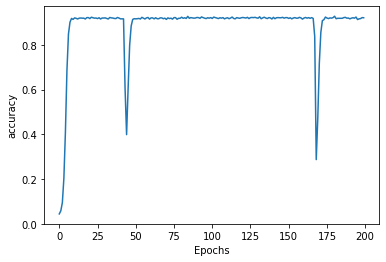

In [9]:
plot_graphs(history, 'accuracy')

In [10]:
seed_text = "Ab mazak nahi, "
next_words = 100
  
for _ in range(next_words):
	token_list = tokenizer.texts_to_sequences([seed_text])[0]
	token_list = pad_sequences([token_list], maxlen=max_len-1, padding='pre')
	predicted = model.predict_classes(token_list, verbose=0)
	output_word = ""
	for word, index in tokenizer.word_index.items():
		if index == predicted:
			output_word = word
			break
	seed_text += " " + output_word
print(seed_text)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


Ab mazak nahi,  bahut seh li logo ki bheed ko sun ye he dil me machti he halchal mujhme chalao apni rail he bhadi ko vo he sahi dil ke ander karne wala raaj hoga sahi se ki isko mat nibhana us waqt jab ho is sabdh ka ehsaas har pukaar na aye kisi ki unglian unglian he gun survive gun yaad to jigar vahi to to mere fans ko mila etihaas mere geet sunke me is geet sunke me is me na tik nahi payega mere samne gao nahi ho me raat nahi he crime track ayega utna me bheed ko kese
